# 팀 프로젝트 : 코로나 시국에 따른 서울 시민 소비문화 변화 추이

In [61]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib
from matplotlib import font_manager, rc
import platform

import numpy as np
import time

In [62]:
path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
    
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system()=="Darwin":
    rc('font', family='AppleGothic')
else:
    print("Unknown System")
    
matplotlib.rcParams['axes.unicode_minus'] = False

### 01) 이용건수 소계 데이터 셋 불러오기

In [63]:
bike_sum = pd.read_csv('./data_set/공공자전거_이용건수_소계.csv')
bike_sum.head()

,대여일자,여성,남성,미상,총 이용건수,AGE_001,AGE_002,AGE_003,AGE_004,AGE_005,AGE_006,AGE_007,AGE_008,AGE_009
0,Jan-20,113769,258052,422341,794162,28787,326277,187520,127519,79939,23260,5060,15800,0
1,Feb-20,119053,249361,393860,762274,29083,317169,176534,121663,75398,21048,4586,16793,0
2,Mar-20,264416,392151,876968,1533535,76255,704244,333664,215159,122946,32372,6520,42375,0
3,Apr-20,356697,498752,1301941,2157390,119026,995677,485148,299685,161736,39643,7573,48902,0
4,May-20,373831,531646,1574853,2480330,136688,1164916,559575,335044,179794,44223,8235,51855,0


### 02) 월별 공공 자전거 이용 건수

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Jan-20'),
  Text(1, 0, 'Feb-20'),
  Text(2, 0, 'Mar-20'),
  Text(3, 0, 'Apr-20'),
  Text(4, 0, 'May-20'),
  Text(5, 0, 'Jun-20'),
  Text(6, 0, 'Jul-20'),
  Text(7, 0, 'Aug-20'),
  Text(8, 0, 'Sep-20'),
  Text(9, 0, 'Oct-20'),
  Text(10, 0, 'Nov-20'),
  Text(11, 0, 'Dec-20'),
  Text(12, 0, 'Jan-21'),
  Text(13, 0, 'Feb-21'),
  Text(14, 0, 'Mar-21'),
  Text(15, 0, 'Apr-21'),
  Text(16, 0, 'May-21'),
  Text(17, 0, 'Jun-21')])

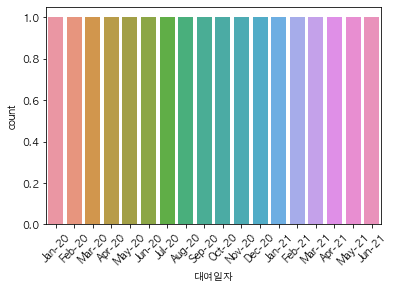

In [64]:
sns.countplot(x='대여일자', data=bike_sum)
plt.xticks(rotation=45)
# 소계 데이터셋으로 카운트플롯 사용하는 것은 잘못된 접근

### 03) 월별 공공 자전거 남성 이용 건수 ( 선 그래프 )

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

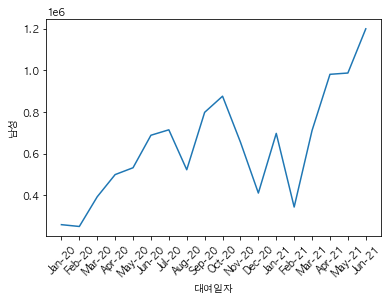

In [65]:
# 남성 이용객의 대여일자별 이용건수
sns.lineplot(x='대여일자', y='남성', data=bike_sum)
plt.xticks(rotation=45)

### 03) 월별 공공 자전거 남성 이용 건수( 막대그래프 )

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Jan-20'),
  Text(1, 0, 'Feb-20'),
  Text(2, 0, 'Mar-20'),
  Text(3, 0, 'Apr-20'),
  Text(4, 0, 'May-20'),
  Text(5, 0, 'Jun-20'),
  Text(6, 0, 'Jul-20'),
  Text(7, 0, 'Aug-20'),
  Text(8, 0, 'Sep-20'),
  Text(9, 0, 'Oct-20'),
  Text(10, 0, 'Nov-20'),
  Text(11, 0, 'Dec-20'),
  Text(12, 0, 'Jan-21'),
  Text(13, 0, 'Feb-21'),
  Text(14, 0, 'Mar-21'),
  Text(15, 0, 'Apr-21'),
  Text(16, 0, 'May-21'),
  Text(17, 0, 'Jun-21')])

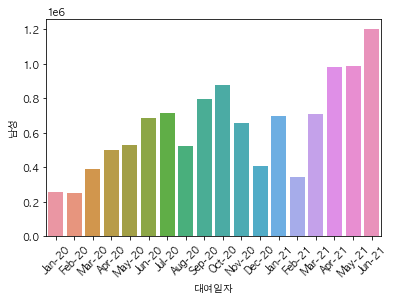

In [66]:
sns.barplot(x='대여일자', y='남성', data=bike_sum)
plt.xticks(rotation=45)

### 04) 2020년 공공자전거 이용정보 데이터셋 불러오기

In [78]:
bike_2020 = pd.read_csv('./data_set/공공자전거 이용정보(2020년 전월).csv', encoding = 'cp949')
bike_2020.columns

Index(['대여일자', '대여소번호', '대여소명', '대여구분코드', '성별', '연령대코드', '이용건수', '운동량', '탄소량',
       '이동거리', '이용시간', '여성', '남성', '미상', '총 이용건수', 'AGE_001', 'AGE_002',
       'AGE_003', 'AGE_004', 'AGE_005', 'AGE_006', 'AGE_007', 'AGE_008',
       'AGE_009'],
      dtype='object')

### 05) 2020년 공공자전거 이용정보 데이터셋 전처리 (필요없는 컬럼 삭제)

In [79]:
bike_2020.drop(['여성', '남성', '미상', '총 이용건수', 'AGE_001', 'AGE_002',
       'AGE_003', 'AGE_004', 'AGE_005', 'AGE_006', 'AGE_007', 'AGE_008',
       'AGE_009'],axis=1)

,대여일자,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,이용시간
0,20-Jan,3.0,중랑센터,일일(회원),M,AGE_003,3.0,61.82,0.52,2230.0,75.0
1,20-Jan,3.0,중랑센터,일일(회원),M,AGE_004,1.0,39.62,0.28,1220.0,15.0
2,20-Jan,3.0,중랑센터,정기,M,AGE_005,3.0,430.85,4.01,17270.0,53.0
3,20-Jan,5.0,상암센터 정비실,일일(회원),\N,AGE_005,2.0,1.79,0.02,90.0,33.0
4,20-Jan,5.0,상암센터 정비실,정기,F,AGE_003,1.0,4501.96,45.47,196010.0,64.0
...,...,...,...,...,...,...,...,...,...,...,...
948883,20-Dec,9999.0,시스템관리팀,정기,M,AGE_003,2.0,0,0,0.0,76.0
948884,20-Dec,9999.0,시스템관리팀,정기,M,AGE_004,1.0,\N,\N,0.0,15.0
948885,20-Dec,99999.0,99999. 영남단말기정비,정기,\N,AGE_008,7.0,0,0,0.0,18.0
948886,20-Dec,99999.0,99999. 영남단말기정비,정기,M,AGE_004,3.0,0,0,0.0,15.0


### 06) 월별 공공 자전거 이용건수 ( 데이터 셋: 2020년 )

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, '20-Jan'),
  Text(1, 0, '20-Feb'),
  Text(2, 0, '20-Mar'),
  Text(3, 0, '20-Apr'),
  Text(4, 0, '20-May'),
  Text(5, 0, '20-Jun'),
  Text(6, 0, '20-Jul'),
  Text(7, 0, '20-Aug'),
  Text(8, 0, '20-Sep'),
  Text(9, 0, '20-Oct'),
  Text(10, 0, '20-Nov'),
  Text(11, 0, '20-Dec')])

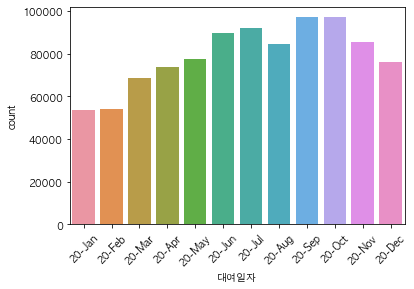

In [80]:
sns.countplot(x='대여일자', data=bike_2020)
plt.xticks(rotation=45)

### 07) 성별에 따른 월별 공공 자전거 이용건수 ( 데이터 셋 : 2020년 )

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, '20-Jan'),
  Text(1, 0, '20-Feb'),
  Text(2, 0, '20-Mar'),
  Text(3, 0, '20-Apr'),
  Text(4, 0, '20-May'),
  Text(5, 0, '20-Jun'),
  Text(6, 0, '20-Jul'),
  Text(7, 0, '20-Aug'),
  Text(8, 0, '20-Sep'),
  Text(9, 0, '20-Oct'),
  Text(10, 0, '20-Nov'),
  Text(11, 0, '20-Dec')])

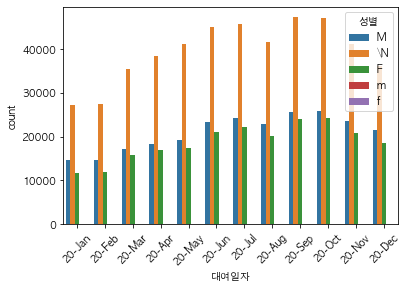

In [81]:
sns.countplot(x='대여일자', hue='성별',data=bike_2020)
plt.xticks(rotation=45)

##### 07 결론) 성별을 알수없는 이용객이 2배이상 많아서 성별로 구분하는 것은 어려울 듯 하다.

### 08) 성별에 따른 이용시간

<AxesSubplot:xlabel='성별', ylabel='이용시간'>

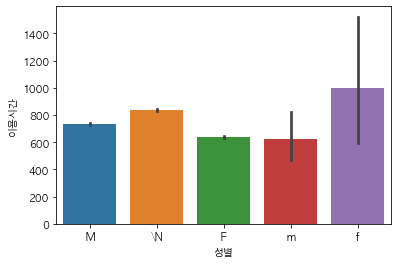

In [89]:
sns.barplot(x='성별', y='이용시간',data=bike_2020)

##### 08) 성별에 M,F,m,f,\N 다섯가지로 구분이 되어있어서 M과 m을 F와 f를 통일 시켜야함

In [76]:
bike_2020['성별'] =  bike_2020['성별'].map({'f':'F','m':'M'})

##### 08) 위 코드는 모든 성별의 요소값을 'NaN'으로 만들어버리는 오류가 생김. 따라서, 여자는 0, 남자는 1, 알수없음은 3으로 표시

In [88]:
bike_2020['성별'] =  bike_2020['성별'].map({'F':0, 'f':0, 'M':1, 'm':1, '\N':3}).astype('int16')
bike_2020.head(10)

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 0-1: malformed \N character escape (<ipython-input-88-38d71e520607>, line 1)

In [34]:
# 남녀 성별에 따른 이용시간 대비 운동량

# 컬럼명'운동량'은 object로서 str 자료형이고, 컬럼 '운동시간' 은 float64이다. 따라서 계산을 위해서는 float64로 자료형 통일해줘야한다.
bike_2020.info()  

# 자료형변환
bike_2020['운동량']=  bike_2020['운동량'].astype('float64')

sns.barplot(x='성별', y='운동량'/'이용시간',data=bike_2020)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 948888 entries, 0 to 948887
Data columns (total 24 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   대여일자     948887 non-null  object 
 1   대여소번호    948887 non-null  float64
 2   대여소명     948887 non-null  object 
 3   대여구분코드   948887 non-null  object 
 4   성별       948887 non-null  object 
 5   연령대코드    948887 non-null  object 
 6   이용건수     948887 non-null  float64
 7   운동량      948887 non-null  object 
 8   탄소량      948887 non-null  object 
 9   이동거리     948887 non-null  float64
 10  이용시간     948887 non-null  float64
 11  여성       13 non-null      float64
 12  남성       13 non-null      float64
 13  미상       13 non-null      float64
 14  총 이용건수   13 non-null      float64
 15  AGE_001  13 non-null      float64
 16  AGE_002  13 non-null      float64
 17  AGE_003  13 non-null      float64
 18  AGE_004  13 non-null      float64
 19  AGE_005  13 non-null      float64
 20  AGE_006  13 non-null      

ValueError: could not convert string to float: '\\N'

In [32]:
bike_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 948888 entries, 0 to 948887
Data columns (total 24 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   대여일자     948887 non-null  object 
 1   대여소번호    948887 non-null  float64
 2   대여소명     948887 non-null  object 
 3   대여구분코드   948887 non-null  object 
 4   성별       948887 non-null  object 
 5   연령대코드    948887 non-null  object 
 6   이용건수     948887 non-null  float64
 7   운동량      948887 non-null  object 
 8   탄소량      948887 non-null  object 
 9   이동거리     948887 non-null  float64
 10  이용시간     948887 non-null  float64
 11  여성       13 non-null      float64
 12  남성       13 non-null      float64
 13  미상       13 non-null      float64
 14  총 이용건수   13 non-null      float64
 15  AGE_001  13 non-null      float64
 16  AGE_002  13 non-null      float64
 17  AGE_003  13 non-null      float64
 18  AGE_004  13 non-null      float64
 19  AGE_005  13 non-null      float64
 20  AGE_006  13 non-null      

KeyError: '\\N'